 # Name - PRANAV BANDAWAR
 

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\91952'

In [4]:
path ='C:\\Users\\91952\\Downloads\\'

In [5]:
#reading the data
data = pd.read_csv(path+"Fraud.csv")

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#Visualizing Missing Data
import missingno as msno

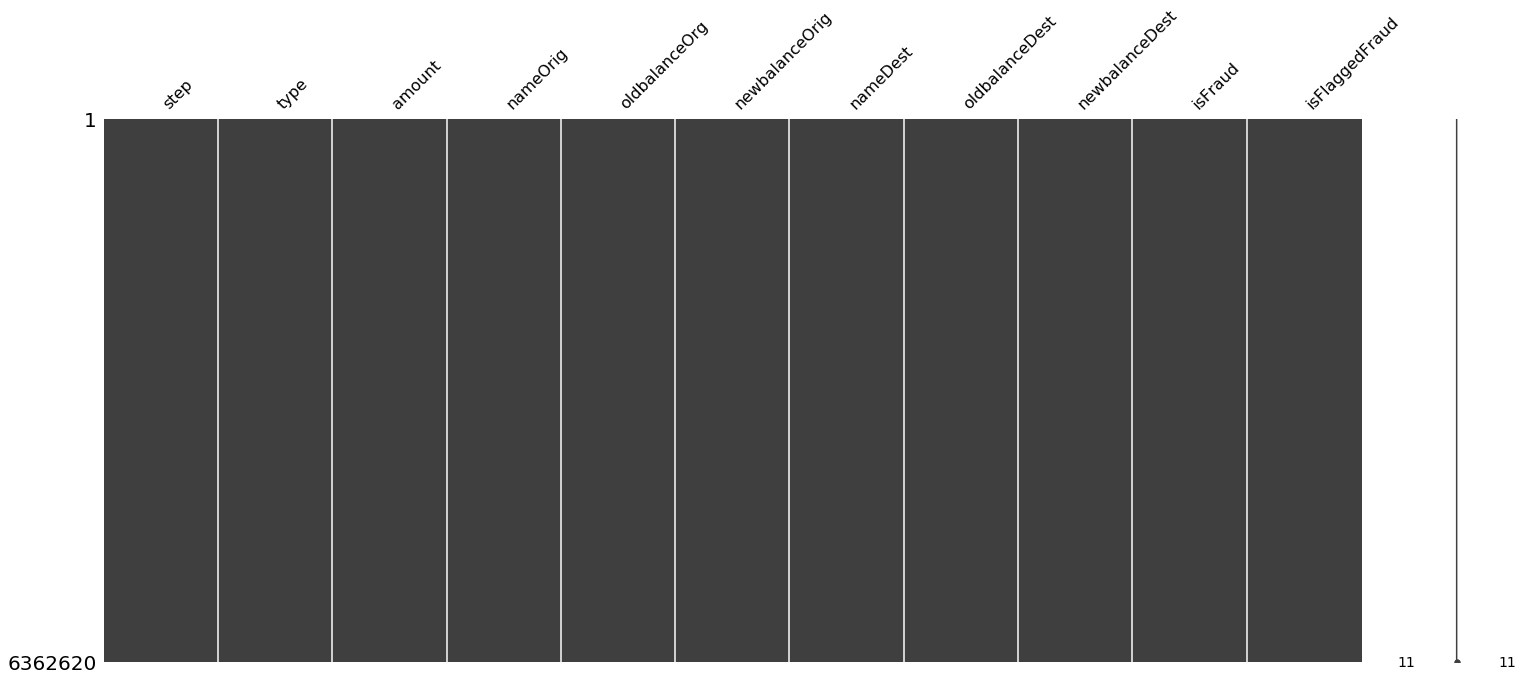

In [9]:
msno.matrix(data)

In [10]:
# Columns having missing values
missing_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
missing_columns

[]

In [11]:
#we can see that there are no mssing values

In [12]:
#encoding the object type in the dataset
from sklearn.preprocessing import LabelEncoder

In [13]:

lb = LabelEncoder()
data_temp = data.copy()
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in cat_cols:
    data_temp[col] = lb.fit_transform(data_temp[col])

In [14]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


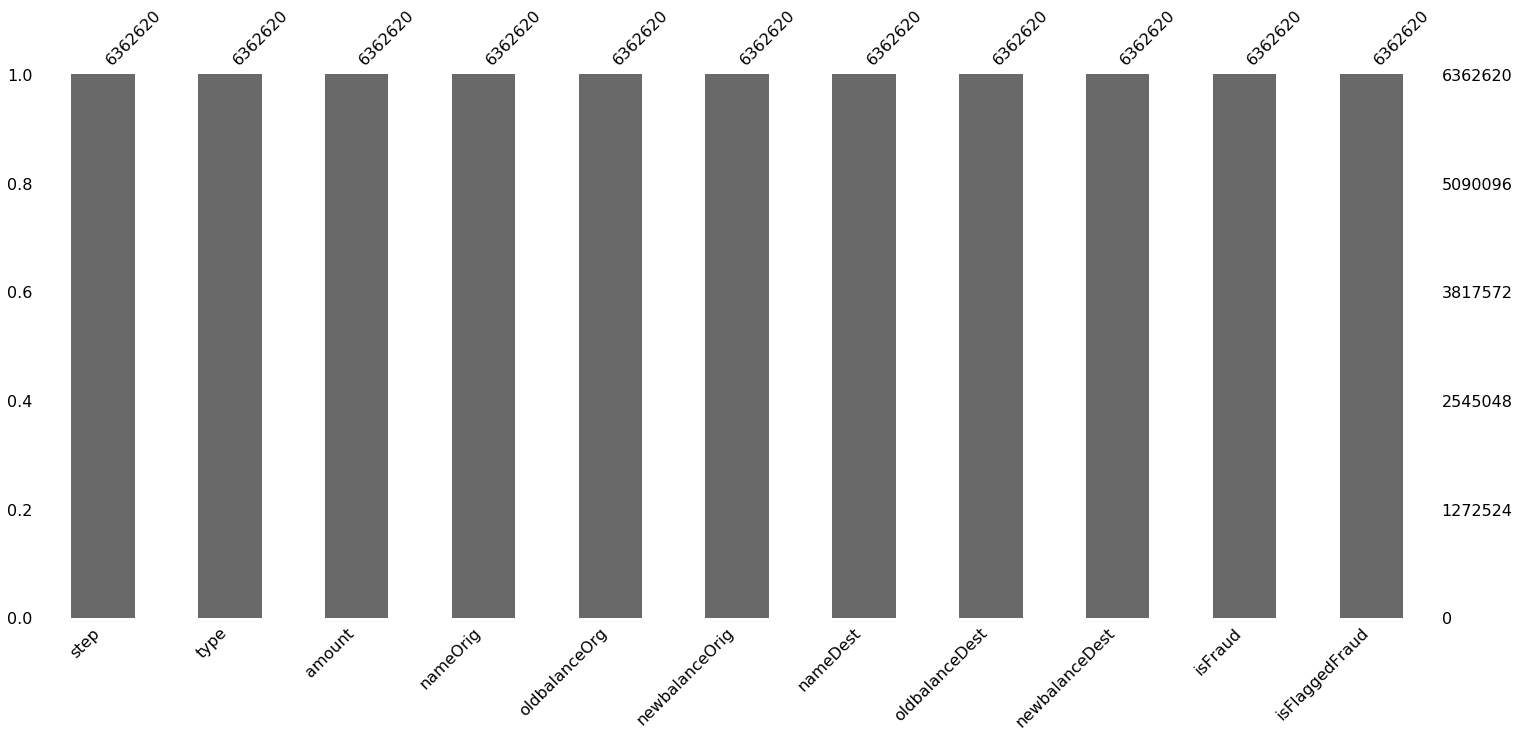

In [15]:
msno.bar(data_temp)

In [16]:
data_temp.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [17]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
#dropping these 2 columns because i thought the names of  orig and dest are not important in concluding the output
data_temp.drop(['nameOrig','nameDest'],axis=1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [19]:
data_temp.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [21]:
data_temp.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [22]:
# Checking how skewed our dataset is : 

print('No Frauds', round(data_temp['isFraud'].value_counts()[0]/len(data_temp) * 100,2), '% of the dataset')
print('Frauds', round(data_temp['isFraud'].value_counts()[1]/len(data_temp) * 100,2), '% of the dataset')

No Frauds 99.87 % of the dataset
Frauds 0.13 % of the dataset


In [23]:
#as the data is not well distrubted ..scaling is very important to see the dependance of each column on the output
from sklearn.preprocessing import RobustScaler



rob_scaler = RobustScaler()
dts=data_temp.copy()


In [24]:
dts.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [25]:
#dts = data temp +scaled 
dts['scaled_amount'] = rob_scaler.fit_transform(dts['amount'].values.reshape(-1,1))


In [26]:
dts['scaled_oldbalanceOrg'] = rob_scaler.fit_transform(dts['oldbalanceOrg'].values.reshape(-1,1))
dts['scaled_newbalanceOrig'] = rob_scaler.fit_transform(dts['newbalanceOrig'].values.reshape(-1,1))
dts['scaled_oldbalanceDest'] = rob_scaler.fit_transform(dts['oldbalanceDest'].values.reshape(-1,1))
dts['scaled_newbalanceDest'] = rob_scaler.fit_transform(dts['newbalanceDest'].values.reshape(-1,1))

In [27]:
dts.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,scaled_amount,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,-0.332932,1.452991,1.111175,-0.140722,-0.193057
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,-0.373762,0.065610,0.134375,-0.140722,-0.193057
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,-0.382380,-0.130708,0.000000,-0.140722,-0.193057
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,-0.382380,-0.130708,0.000000,-0.118260,-0.193057
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,-0.323571,0.254820,0.207169,-0.140722,-0.193057


In [28]:
dts.drop(['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis=1, inplace=True)

In [29]:

dts.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
#dropping previous unscaled  and unimportant columns

In [30]:
dts.head()

,step,type,isFraud,isFlaggedFraud,scaled_amount,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
0,1,3,0,0,-0.332932,1.452991,1.111175,-0.140722,-0.193057
1,1,3,0,0,-0.373762,0.065610,0.134375,-0.140722,-0.193057
2,1,4,1,0,-0.382380,-0.130708,0.000000,-0.140722,-0.193057
3,1,1,1,0,-0.382380,-0.130708,0.000000,-0.118260,-0.193057
4,1,3,0,0,-0.323571,0.254820,0.207169,-0.140722,-0.193057


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [32]:
X = dts.drop('isFraud', axis=1)
y = dts['isFraud']

In [33]:
X.head()

,step,type,isFlaggedFraud,scaled_amount,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
0,1,3,0,-0.332932,1.452991,1.111175,-0.140722,-0.193057
1,1,3,0,-0.373762,0.065610,0.134375,-0.140722,-0.193057
2,1,4,0,-0.382380,-0.130708,0.000000,-0.140722,-0.193057
3,1,1,0,-0.382380,-0.130708,0.000000,-0.118260,-0.193057
4,1,3,0,-0.323571,0.254820,0.207169,-0.140722,-0.193057


In [34]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [35]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

Train: [      0       1       2 ... 6362615 6362618 6362619] Test: [     12      19      23 ... 6362613 6362616 6362617]
Train: [      0       1       2 ... 6362616 6362617 6362619] Test: [      4       7      17 ... 6362611 6362615 6362618]
Train: [      2       3       4 ... 6362617 6362618 6362619] Test: [      0       1      10 ... 6362600 6362604 6362614]
Train: [      0       1       2 ... 6362617 6362618 6362619] Test: [      5       6       8 ... 6362601 6362607 6362612]
Train: [      0       1       4 ... 6362616 6362617 6362618] Test: [      2       3       9 ... 6362598 6362608 6362619]


In [37]:
# Finding the number of fraud cases in our dataset
dts['isFraud'].value_counts()[1]

8213

In [38]:
#Random Under-Sampling
df = dts.sample(frac=1)

# amount of fraud classes 8213 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:8213]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,step,type,isFraud,isFlaggedFraud,scaled_amount,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
4250584,306,1,0,0,-0.252624,-0.132395,0.000000,0.110961,0.159091
591929,33,0,0,0,-0.301499,50.349778,37.664929,3.259634,2.676495
2799308,217,4,1,0,2.372578,4.883783,0.000000,-0.140722,-0.193057
1030762,91,1,1,0,4.335170,8.456036,0.000000,-0.038503,0.722544
6055669,497,4,1,0,5.642851,10.836238,0.000000,-0.140722,-0.193057


([<matplotlib.patches.Wedge at 0x21417248148>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'Not Frauds'),
  Text(1.1, -2.6942229581241775e-16, 'Frauds')],
 [Text(-0.7, 8.572527594031472e-17, '50.00'),
  Text(0.6, -1.4695761589768238e-16, '50.00')])

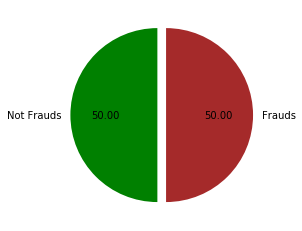

In [57]:
# Seeing the equally balanced distribution of classes
import matplotlib.pyplot as plt
explodeTuple = (0.1, 0)
pieLabels = 'Not Frauds', 'Frauds'
figureObject, axesObject = plt.subplots()
colors = ("green","brown")
shares = [round(new_df['isFraud'].value_counts()[0]/len(new_df) * 100,2),round(new_df['isFraud'].value_counts()[1]/len(new_df) * 100,2) ]
axesObject.pie(shares,explode = explodeTuple,
        colors = colors,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)

In [40]:
#Correlation Matrcies
corr_matrix = new_df.corr()
print(corr_matrix["isFraud"].sort_values(ascending=False))

isFraud                  1.000000
scaled_amount            0.350186
step                     0.321822
type                     0.273426
scaled_oldbalanceOrg     0.114755
isFlaggedFraud           0.031225
scaled_newbalanceDest    0.015343
scaled_oldbalanceDest   -0.085135
scaled_newbalanceOrig   -0.138283
Name: isFraud, dtype: float64


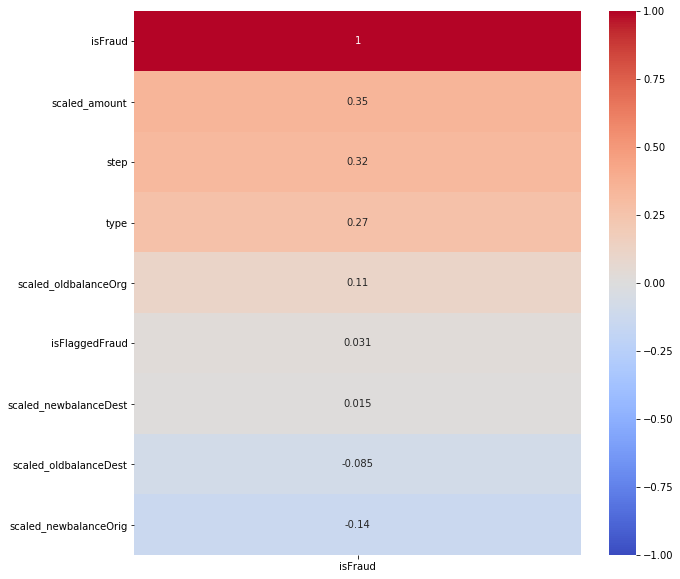

In [41]:
# Visualising the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix[['isFraud']].sort_values(by=['isFraud'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

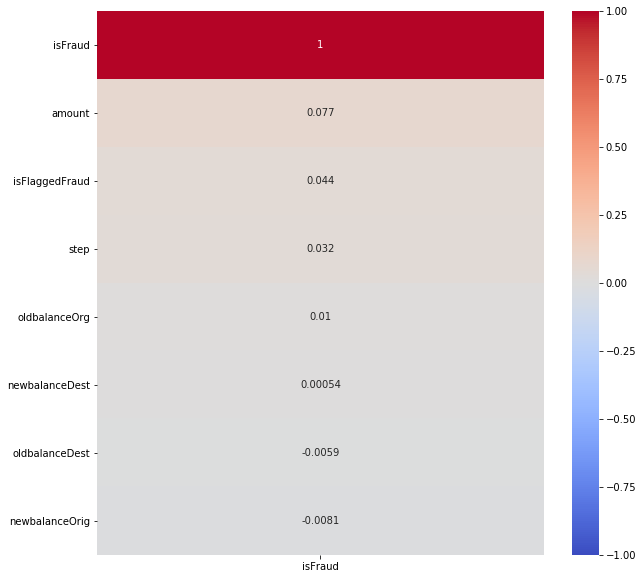

In [42]:
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix[['isFraud']].sort_values(by=['isFraud'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

## we can clearly see that scaled data has way  more corerealtion on the output


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

classifiers = {
    #"LogisiticRegression": LogisticRegression(),
   # "KNearest": KNeighborsClassifier(),
   # "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", training_score.mean() * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a training score of 98.76712328767124 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 99.01065449010653 % accuracy score


## trying to fine tune

In [52]:
from sklearn.model_selection import GridSearchCV
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# Random Forest Classifier
forest_params = {"n_estimators":[10, 100], "criterion":["gini", "entropy"], "min_samples_split":list(range(2, 5, 1))}
grid_forest = GridSearchCV(RandomForestClassifier(), forest_params)
grid_forest.fit(X_train, y_train)

# Tree best estimator
tree_clf = grid_tree.best_estimator_
print(grid_tree.best_params_)
print("-" * 115)
# Forest best estimator
forest_clf = grid_forest.best_estimator_
print(grid_forest.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
-------------------------------------------------------------------------------------------------------------------
{'criterion': 'entropy', 'min_samples_split': 3, 'n_estimators': 100}


In [53]:
# Now let us see the cross_val score of our best models that we found using the GridSearchCV:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv = 5)
print("Best DecisionTree model has a cross-validation score of ", tree_score.mean() * 100, "on the training set")

forest_score = cross_val_score(forest_clf, X_train, y_train, cv = 5)
print("Best RandomForest model has a cross-validation score of ", forest_score.mean() * 100, "on the training set")


Best DecisionTree model has a cross-validation score of  93.82800608828006 on the training set
Best RandomForest model has a cross-validation score of  99.01826484018265 on the training set


In [56]:
# Finding the accuracy score on the original testing dataset:

tree_score_test_orig = cross_val_score(tree_clf,X_test,y_test, cv = 2)
print("Best DecisionTree model has a cross-validation score of ", tree_score_test_orig.mean() * 100, "on the testing set")

forest_score_test_orig = cross_val_score(forest_clf,X_test,y_test, cv = 2)
print("Best RandomForest model has a cross-validation score of ", forest_score_test_orig.mean() * 100, "on the testing set")

Best DecisionTree model has a cross-validation score of  91.78332318928788 on the testing set
Best RandomForest model has a cross-validation score of  97.53499695678637 on the testing set


# CONCLUSION
## so i tried to preprocess the data in which i dealed with missing values ,did encoding of object datatype,dropped unimportant columns ,scaled the data for better correlation.then as the data was heavily skewed ,i created a new dataset to have 50-50 chances of a row being fraud or nonfraud...then ran different algorithms on the new dataset..Descison tree and Randomforest gave the best results..i tried to fine tune the parameters...it didnt help in case of decision tree but slightly increased training accuracy of the randomforest algorithm..then i tested the model on the testing data and it gave score of 97.5 